# English Premier League Data Storytelling (2010 - 2020)

#### #Import packages

In [173]:
import requests
from bs4 import BeautifulSoup
import lxml.html as lh
from urllib.request import urlopen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [174]:
url = "https://fbref.com/en/comps/9/3232/2019-2020-Premier-League-Stats"
html = urlopen(url)

In [175]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [176]:
# Get the title
title = soup.title
print(title)

<title>2019-2020 Premier League Stats | FBref.com</title>


In [177]:
tables = pd.read_html(url)
print(len(tables))
tables[0].head()

2


,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,xG,xGA,xGDiff,xGDiff/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,38,32,3,3,85,33,52,99,70.7,39.9,30.8,0.81,41955,Mohamed Salah - 19,Alisson,→ UEFA Champions League via league finish
1,2,Manchester City,38,26,3,9,102,35,67,81,93.5,34.4,59.1,1.56,37097,Raheem Sterling - 20,Ederson,→ UEFA Champions League via league finish
2,3,Manchester Utd,38,18,12,8,66,36,30,66,59.8,37.2,22.5,0.59,57415,"Marcus Rashford, Anthony Martial - 17",David de Gea,→ UEFA Champions League via league finish
3,4,Chelsea,38,20,6,12,69,54,15,66,66.8,37.5,29.3,0.77,32023,Tammy Abraham - 15,Kepa Arrizabalaga,→ UEFA Champions League via league finish
4,5,Leicester City,38,18,8,12,67,41,26,62,60.8,44.9,15.9,0.42,25312,Jamie Vardy - 23,Kasper Schmeichel,→ UEFA Europa League via league finish


### # Function to get the info of the table

In [178]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

### # Function to get Season

In [179]:
def cw(df):
    df['Season']=''
    df['Start'] = 2020 - df['Index']
    df['End'] = 2020 - df['Index'] +1
    for i in range(len(df)):
        df.iloc[i,len(df.columns)-3] = str( df.iloc[i,len(df.columns)-2]) +'_'+ str(df.iloc[i,len(df.columns)-1])
    return(df)

## # Extracting the overall Stats of each team

In [180]:
df = pd.DataFrame()
url = ["https://fbref.com/en/comps/9/3232/2019-2020-Premier-League-Stats",
"https://fbref.com/en/comps/9/1889/2018-2019-Premier-League-Stats",
"https://fbref.com/en/comps/9/1631/2017-2018-Premier-League-Stats",
"https://fbref.com/en/comps/9/1526/2016-2017-Premier-League-Stats",
"https://fbref.com/en/comps/9/1467/2015-2016-Premier-League-Stats",
"https://fbref.com/en/comps/9/733/2014-2015-Premier-League-Stats",
"https://fbref.com/en/comps/9/669/2013-2014-Premier-League-Stats",
"https://fbref.com/en/comps/9/602/2012-2013-Premier-League-Stats",
"https://fbref.com/en/comps/9/534/2011-2012-Premier-League-Stats",
"https://fbref.com/en/comps/9/467/2010-2011-Premier-League-Stats"]
for i in range(len(url)):
    tables = pd.read_html(url[i])[0]
    tables['Index']=i+1
    df = df.append(tables)
cw(df)
resumetable(df)
print(df.head())

Dataset Shape: (200, 22)
   Rk            Squad  MP   W   D   L   GF  GA  GDiff  Pts  ...  xGDiff  \
0   1        Liverpool  38  32   3   3   85  33     52   99  ...    30.8   
1   2  Manchester City  38  26   3   9  102  35     67   81  ...    59.1   
2   3   Manchester Utd  38  18  12   8   66  36     30   66  ...    22.5   
3   4          Chelsea  38  20   6  12   69  54     15   66  ...    29.3   
4   5   Leicester City  38  18   8  12   67  41     26   62  ...    15.9   

   xGDiff/90  Attendance                        Top Team Scorer  \
0       0.81       41955                     Mohamed Salah - 19   
1       1.56       37097                   Raheem Sterling - 20   
2       0.59       57415  Marcus Rashford, Anthony Martial - 17   
3       0.77       32023                     Tammy Abraham - 15   
4       0.42       25312                       Jamie Vardy - 23   

          Goalkeeper                                      Notes Index  \
0            Alisson  → UEFA Champions Lea

# Shooting Stat

In [182]:
df_s = pd.DataFrame()

url_s = ["https://fbref.com/en/comps/9/shooting/3232/2019-2020-Premier-League-Stats",
"https://fbref.com/en/comps/9/shooting/1889/2018-2019-Premier-League-Stats",
"https://fbref.com/en/comps/9/shooting/1631/2017-2018-Premier-League-Stats",
"https://fbref.com/en/comps/9/shooting/1526/2016-2017-Premier-League-Stats",
"https://fbref.com/en/comps/9/shooting/1467/2015-2016-Premier-League-Stats",
"https://fbref.com/en/comps/9/shooting/733/2014-2015-Premier-League-Stats",
"https://fbref.com/en/comps/9/shooting/669/2013-2014-Premier-League-Stats",
"https://fbref.com/en/comps/9/shooting/602/2012-2013-Premier-League-Stats",
"https://fbref.com/en/comps/9/shooting/534/2011-2012-Premier-League-Stats",
"https://fbref.com/en/comps/9/shooting/467/2010-2011-Premier-League-Stats"
]

for i in range(len(url_s)):
    tables = pd.read_html(url_s[i])[0]
    tables['Index']=i+1
    df_s = df_s.append(tables)
cw(df_s)
resumetable(df_s)
print(df_s.head())

Dataset Shape: (160, 22)
  Unnamed: 0_level_0 Unnamed: 1_level_0 Standard                             \
               Squad               # Pl      Gls  Sh SoT  SoT% Sh/90 SoT/90   
0            Arsenal                 14        3  13   5  38.5  13.0    5.0   
1           Brighton                 14        1  13   3  23.1  13.0    3.0   
2            Chelsea                 14        3   9   4  44.4   9.0    4.0   
3     Crystal Palace                 13        1   6   3  50.0   6.0    3.0   
4            Everton                 14        1  15   5  33.3  15.0    5.0   

               ...       Expected                           Index     Season  \
   G/Sh G/SoT  ... PKatt       xG npxG npxG/Sh G-xG np:G-xG                    
0  0.23  0.60  ...     0      1.8  1.8    0.15  1.2     1.2     1  2019_2020   
1  0.08  0.33  ...     0      1.3  1.3    0.10 -0.3    -0.3     1  2019_2020   
2  0.22  0.50  ...     1      1.2  0.4    0.05  1.8     1.6     1  2019_2020   
3  0.17  0.33  ...   

# Passing

In [183]:
df_p = pd.DataFrame()

url_p = ["https://fbref.com/en/comps/9/passing/3232/2019-2020-Premier-League-Stats",
"https://fbref.com/en/comps/9/passing/1889/2018-2019-Premier-League-Stats",
"https://fbref.com/en/comps/9/passing/1631/2017-2018-Premier-League-Stats",
"https://fbref.com/en/comps/9/passing/1526/2016-2017-Premier-League-Stats",
"https://fbref.com/en/comps/9/passing/1467/2015-2016-Premier-League-Stats",
"https://fbref.com/en/comps/9/passing/733/2014-2015-Premier-League-Stats",
"https://fbref.com/en/comps/9/passing/669/2013-2014-Premier-League-Stats",
"https://fbref.com/en/comps/9/passing/602/2012-2013-Premier-League-Stats",
"https://fbref.com/en/comps/9/passing/534/2011-2012-Premier-League-Stats",
"https://fbref.com/en/comps/9/passing/467/2010-2011-Premier-League-Stats"
]

for i in range(len(url_p)):
    tables = pd.read_html(url_p[i])[0]
    tables['Index']=i+1
    df_p = df_p.append(tables)
cw(df_p)
resumetable(df_p)
print(df_p.head())

Dataset Shape: (160, 28)
  Unnamed: 0_level_0 Unnamed: 1_level_0 Total                             \
               Squad               # Pl   Cmp  Att  Cmp% TotDist PrgDist   
0            Arsenal                 14   595  670  88.8   12138    2779   
1           Brighton                 14   444  548  81.0    8912    2433   
2            Chelsea                 14   402  485  82.9    7964    2415   
3     Crystal Palace                 13   153  279  54.8    3301    1867   
4            Everton                 14   473  562  84.2    9228    2794   

  Short            ... Unnamed: 18_level_0 Unnamed: 19_level_0  \
    Cmp Att  Cmp%  ...                A-xA                  KP   
0     4  13  30.8  ...                 1.1                   8   
1     9  21  42.9  ...                -0.2                  11   
2     5  18  27.8  ...                 1.6                   9   
3     5  20  25.0  ...                 0.2                   6   
4     7  19  36.8  ...                 0.3    

# Defence

In [184]:
df_d = pd.DataFrame()

url_d = ["https://fbref.com/en/comps/9/defense/3232/2019-2020-Premier-League-Stats",
"https://fbref.com/en/comps/9/defense/1889/2018-2019-Premier-League-Stats",
"https://fbref.com/en/comps/9/defense/1631/2017-2018-Premier-League-Stats",
"https://fbref.com/en/comps/9/defense/1526/2016-2017-Premier-League-Stats",
"https://fbref.com/en/comps/9/defense/1467/2015-2016-Premier-League-Stats",
"https://fbref.com/en/comps/9/defense/733/2014-2015-Premier-League-Stats",
"https://fbref.com/en/comps/9/defense/669/2013-2014-Premier-League-Stats",
"https://fbref.com/en/comps/9/defense/602/2012-2013-Premier-League-Stats",
"https://fbref.com/en/comps/9/defense/534/2011-2012-Premier-League-Stats",
"https://fbref.com/en/comps/9/defense/467/2010-2011-Premier-League-Stats"]

for i in range(len(url_d)):
    tables = pd.read_html(url_d[i])[0]
    tables['Index']=i+1
    df_d = df_d.append(tables)
    
cw(df_d)
resumetable(df_d)
print(df_d.head())

Dataset Shape: (160, 29)
  Unnamed: 0_level_0 Unnamed: 1_level_0 Tackles                               \
               Squad               # Pl     Tkl TklW Def 3rd Mid 3rd Att 3rd   
0            Arsenal                 14      11    9       5       3       3   
1           Brighton                 14      20   13       6       8       6   
2            Chelsea                 14      20   10      10      10       0   
3     Crystal Palace                 13      20   11      10       7       3   
4            Everton                 14      18   15      11       5       2   

  Vs Dribbles            ... Blocks      Unnamed: 21_level_0  \
          Tkl Att  Tkl%  ...   ShSv Pass                 Int   
0           4  10  40.0  ...      0   11                   5   
1          11  21  52.4  ...      0   15                   5   
2           4  20  20.0  ...      0   14                   9   
3           3   9  33.3  ...      0   16                   5   
4           8  14  57.1  ...  

# Goal Keeping

In [185]:
df_gk = pd.DataFrame()

url_gk = ["https://fbref.com/en/comps/9/keepersadv/3232/2019-2020-Premier-League-Stats",
"https://fbref.com/en/comps/9/keepersadv/1889/2018-2019-Premier-League-Stats",
"https://fbref.com/en/comps/9/keepersadv/1631/2017-2018-Premier-League-Stats",
"https://fbref.com/en/comps/9/keepersadv/1526/2016-2017-Premier-League-Stats",
"https://fbref.com/en/comps/9/keepersadv/1467/2015-2016-Premier-League-Stats",
"https://fbref.com/en/comps/9/keepersadv/733/2014-2015-Premier-League-Stats",
"https://fbref.com/en/comps/9/keepersadv/669/2013-2014-Premier-League-Stats",
"https://fbref.com/en/comps/9/keepersadv/602/2012-2013-Premier-League-Stats",
"https://fbref.com/en/comps/9/keepersadv/534/2011-2012-Premier-League-Stats",
"https://fbref.com/en/comps/9/keepersadv/467/2010-2011-Premier-League-Stats"
]

for i in range(len(url_gk)):
    tables = pd.read_html(url_gk[i])[0]
    tables['Index']=i+1
    df_gk = df_gk.append(tables)
cw(df_gk)
resumetable(df_gk)
print(df_gk.head())

Dataset Shape: (160, 32)
  Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Goals               \
               Squad               # Pl                90s    GA PKA FK CK OG   
0            Arsenal                  1                1.0     0   0  0  0  0   
1           Brighton                  1                1.0     3   1  0  1  0   
2            Chelsea                  1                1.0     1   0  0  0  0   
3     Crystal Palace                  1                1.0     0   0  0  0  0   
4            Everton                  1                1.0     0   0  0  0  0   

  Expected           ... Crosses           Sweeper                 Index  \
      PSxG PSxG/SoT  ...     Opp Stp  Stp%    #OPA #OPA/90 AvgDist         
0      0.0     0.01  ...       9   1  11.1       1     1.0    16.5     1   
1      1.7     0.25  ...       2   1  50.0       0     0.0    10.8     1   
2      0.2     0.08  ...       8   0   0.0       0     0.0    17.0     1   
3      0.7     0.18  ...   

# Posession

In [186]:
df_pos = pd.DataFrame()

url_pos = ["https://fbref.com/en/comps/9/posession/3232/2019-2020-Premier-League-Stats",
"https://fbref.com/en/comps/9/posession/1889/2018-2019-Premier-League-Stats",
"https://fbref.com/en/comps/9/posession/1631/2017-2018-Premier-League-Stats",
"https://fbref.com/en/comps/9/posession/1526/2016-2017-Premier-League-Stats",
"https://fbref.com/en/comps/9/posession/1467/2015-2016-Premier-League-Stats",
"https://fbref.com/en/comps/9/posession/733/2014-2015-Premier-League-Stats",
"https://fbref.com/en/comps/9/posession/669/2013-2014-Premier-League-Stats",
"https://fbref.com/en/comps/9/posession/602/2012-2013-Premier-League-Stats",
"https://fbref.com/en/comps/9/posession/534/2011-2012-Premier-League-Stats",
"https://fbref.com/en/comps/9/posession/467/2010-2011-Premier-League-Stats"
]

for i in range(len(url_pos)):
    tables = pd.read_html(url_pos[i])[0]
    tables['Index']=i+1
    df_pos = df_pos.append(tables)
cw(df_pos)
resumetable(df_pos)
print(df_pos.head())

Dataset Shape: (200, 23)
   Rk           Squad  MP  W  D  L  GF  GA  GDiff  Pts  ...  xGDiff/90  \
0   1         Arsenal   1  1  0  0   3   0      3    3  ...       1.54   
1   2  Leicester City   1  1  0  0   3   0      3    3  ...       1.75   
2   3         Chelsea   1  1  0  0   3   1      2    3  ...      -0.17   
3   4          Wolves   1  1  0  0   2   0      2    3  ...       0.47   
4   5   Newcastle Utd   1  1  0  0   2   0      2    3  ...       0.18   

   Last 5  Attendance                                    Top Team Scorer  \
0       W         NaN  Gabriel Dos Santos, Pierre-Emerick Aubameyang....   
1       W         NaN                                    Jamie Vardy - 2   
2       W         NaN                       Reece James, Jorginho... - 1   
3       W         NaN                     Romain Saïss, Raúl Jiménez - 1   
4       W         NaN                   Jeff Hendrick, Callum Wilson - 1   

          Goalkeeper  Notes Index     Season  Start   End  
0         Ber

# Duplicating the Data frames so that I need not scrape again

In [187]:
overall = df
shooting = df_s
passing = df_p
defense = df_d
gk = df_gk
possession = df_pos

# Changing column names

### # Function to set the column names correct

In [188]:
def col(df):
    mylist = []
    for i in range(0,len(df.columns)):
        a = df.columns[i]
        t=a[0] + '_' + a[1]
        mylist.append(t)
    df.columns= mylist
    return(df)

In [189]:
col(shooting)
col(passing)
col(defense)
col(gk)

,Unnamed: 0_level_0_Squad,Unnamed: 1_level_0_# Pl,Unnamed: 2_level_0_90s,Goals_GA,Goals_PKA,Goals_FK,Goals_CK,Goals_OG,Expected_PSxG,Expected_PSxG/SoT,...,Crosses_Opp,Crosses_Stp,Crosses_Stp%,Sweeper_#OPA,Sweeper_#OPA/90,Sweeper_AvgDist,Index_,Season_,Start_,End_
0,Arsenal,1,1.0,0,0,0,0,0,0.0,0.01,...,9,1,11.1,1,1.0,16.5,1,2019_2020,2019,2020
1,Brighton,1,1.0,3,1,0,1,0,1.7,0.25,...,2,1,50.0,0,0.0,10.8,1,2019_2020,2019,2020
2,Chelsea,1,1.0,1,0,0,0,0,0.2,0.08,...,8,0,0.0,0,0.0,17.0,1,2019_2020,2019,2020
3,Crystal Palace,1,1.0,0,0,0,0,0,0.7,0.18,...,7,1,14.3,0,0.0,8.3,1,2019_2020,2019,2020
4,Everton,1,1.0,0,0,0,0,0,0.6,0.12,...,12,1,8.3,0,0.0,12.6,1,2019_2020,2019,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,Southampton,1,1.0,1,0,0,0,0,0.9,0.29,...,8,1,12.5,4,4.0,25.7,10,2010_2011,2010,2011
12,Tottenham,1,1.0,1,0,0,0,0,0.5,0.09,...,8,0,0.0,2,2.0,21.5,10,2010_2011,2010,2011
13,West Brom,1,1.0,3,2,0,0,0,3.0,0.26,...,6,0,0.0,0,0.0,13.3,10,2010_2011,2010,2011
14,West Ham,1,1.0,2,0,0,0,0,1.9,0.64,...,9,0,0.0,0,0.0,10.7,10,2010_2011,2010,2011


# Checking the columns

In [190]:
overall.head()

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,...,xGDiff,xGDiff/90,Attendance,Top Team Scorer,Goalkeeper,Notes,Index,Season,Start,End
0,1,Liverpool,38,32,3,3,85,33,52,99,...,30.8,0.81,41955,Mohamed Salah - 19,Alisson,→ UEFA Champions League via league finish,1,2019_2020,2019,2020
1,2,Manchester City,38,26,3,9,102,35,67,81,...,59.1,1.56,37097,Raheem Sterling - 20,Ederson,→ UEFA Champions League via league finish,1,2019_2020,2019,2020
2,3,Manchester Utd,38,18,12,8,66,36,30,66,...,22.5,0.59,57415,"Marcus Rashford, Anthony Martial - 17",David de Gea,→ UEFA Champions League via league finish,1,2019_2020,2019,2020
3,4,Chelsea,38,20,6,12,69,54,15,66,...,29.3,0.77,32023,Tammy Abraham - 15,Kepa Arrizabalaga,→ UEFA Champions League via league finish,1,2019_2020,2019,2020
4,5,Leicester City,38,18,8,12,67,41,26,62,...,15.9,0.42,25312,Jamie Vardy - 23,Kasper Schmeichel,→ UEFA Europa League via league finish,1,2019_2020,2019,2020


In [191]:
shooting.head()

,Unnamed: 0_level_0_Squad,Unnamed: 1_level_0_# Pl,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,...,Standard_PKatt,Expected_xG,Expected_npxG,Expected_npxG/Sh,Expected_G-xG,Expected_np:G-xG,Index_,Season_,Start_,End_
0,Arsenal,14,3,13,5,38.5,13.0,5.0,0.23,0.60,...,0,1.8,1.8,0.15,1.2,1.2,1,2019_2020,2019,2020
1,Brighton,14,1,13,3,23.1,13.0,3.0,0.08,0.33,...,0,1.3,1.3,0.10,-0.3,-0.3,1,2019_2020,2019,2020
2,Chelsea,14,3,9,4,44.4,9.0,4.0,0.22,0.50,...,1,1.2,0.4,0.05,1.8,1.6,1,2019_2020,2019,2020
3,Crystal Palace,13,1,6,3,50.0,6.0,3.0,0.17,0.33,...,0,0.8,0.8,0.13,0.2,0.2,1,2019_2020,2019,2020
4,Everton,14,1,15,5,33.3,15.0,5.0,0.07,0.20,...,0,1.4,1.4,0.10,-0.4,-0.4,1,2019_2020,2019,2020


In [192]:
passing.head()

,Unnamed: 0_level_0_Squad,Unnamed: 1_level_0_# Pl,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Short_Cmp%,...,Unnamed: 18_level_0_A-xA,Unnamed: 19_level_0_KP,Unnamed: 20_level_0_1/3,Unnamed: 21_level_0_PPA,Unnamed: 22_level_0_CrsPA,Unnamed: 23_level_0_Prog,Index_,Season_,Start_,End_
0,Arsenal,14,595,670,88.8,12138,2779,4,13,30.8,...,1.1,8,38,10,3,38,1,2019_2020,2019,2020
1,Brighton,14,444,548,81.0,8912,2433,9,21,42.9,...,-0.2,11,31,6,3,32,1,2019_2020,2019,2020
2,Chelsea,14,402,485,82.9,7964,2415,5,18,27.8,...,1.6,9,22,7,1,38,1,2019_2020,2019,2020
3,Crystal Palace,13,153,279,54.8,3301,1867,5,20,25.0,...,0.2,6,20,1,0,39,1,2019_2020,2019,2020
4,Everton,14,473,562,84.2,9228,2794,7,19,36.8,...,0.3,11,26,6,3,41,1,2019_2020,2019,2020


In [193]:
defense.head()

,Unnamed: 0_level_0_Squad,Unnamed: 1_level_0_# Pl,Tackles_Tkl,Tackles_TklW,Tackles_Def 3rd,Tackles_Mid 3rd,Tackles_Att 3rd,Vs Dribbles_Tkl,Vs Dribbles_Att,Vs Dribbles_Tkl%,...,Blocks_ShSv,Blocks_Pass,Unnamed: 21_level_0_Int,Unnamed: 22_level_0_Tkl+Int,Unnamed: 23_level_0_Clr,Unnamed: 24_level_0_Err,Index_,Season_,Start_,End_
0,Arsenal,14,11,9,5,3,3,4,10,40.0,...,0,11,5,16,11,1,1,2019_2020,2019,2020
1,Brighton,14,20,13,6,8,6,11,21,52.4,...,0,15,5,25,7,1,1,2019_2020,2019,2020
2,Chelsea,14,20,10,10,10,0,4,20,20.0,...,0,14,9,29,24,0,1,2019_2020,2019,2020
3,Crystal Palace,13,20,11,10,7,3,3,9,33.3,...,0,16,5,25,30,0,1,2019_2020,2019,2020
4,Everton,14,18,15,11,5,2,8,14,57.1,...,0,13,8,26,42,0,1,2019_2020,2019,2020


In [194]:
gk.head()

,Unnamed: 0_level_0_Squad,Unnamed: 1_level_0_# Pl,Unnamed: 2_level_0_90s,Goals_GA,Goals_PKA,Goals_FK,Goals_CK,Goals_OG,Expected_PSxG,Expected_PSxG/SoT,...,Crosses_Opp,Crosses_Stp,Crosses_Stp%,Sweeper_#OPA,Sweeper_#OPA/90,Sweeper_AvgDist,Index_,Season_,Start_,End_
0,Arsenal,1,1.0,0,0,0,0,0,0.0,0.01,...,9,1,11.1,1,1.0,16.5,1,2019_2020,2019,2020
1,Brighton,1,1.0,3,1,0,1,0,1.7,0.25,...,2,1,50.0,0,0.0,10.8,1,2019_2020,2019,2020
2,Chelsea,1,1.0,1,0,0,0,0,0.2,0.08,...,8,0,0.0,0,0.0,17.0,1,2019_2020,2019,2020
3,Crystal Palace,1,1.0,0,0,0,0,0,0.7,0.18,...,7,1,14.3,0,0.0,8.3,1,2019_2020,2019,2020
4,Everton,1,1.0,0,0,0,0,0,0.6,0.12,...,12,1,8.3,0,0.0,12.6,1,2019_2020,2019,2020


In [195]:
possession.head()

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,...,xGDiff/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes,Index,Season,Start,End
0,1,Arsenal,1,1,0,0,3,0,3,3,...,1.54,W,NaN,"Gabriel Dos Santos, Pierre-Emerick Aubameyang....",Bernd Leno,NaN,1,2019_2020,2019,2020
1,2,Leicester City,1,1,0,0,3,0,3,3,...,1.75,W,NaN,Jamie Vardy - 2,Kasper Schmeichel,NaN,1,2019_2020,2019,2020
2,3,Chelsea,1,1,0,0,3,1,2,3,...,-0.17,W,NaN,"Reece James, Jorginho... - 1",Kepa Arrizabalaga,NaN,1,2019_2020,2019,2020
3,4,Wolves,1,1,0,0,2,0,2,3,...,0.47,W,NaN,"Romain Saïss, Raúl Jiménez - 1",Rui Patrício,NaN,1,2019_2020,2019,2020
4,5,Newcastle Utd,1,1,0,0,2,0,2,3,...,0.18,W,NaN,"Jeff Hendrick, Callum Wilson - 1",Karl Darlow,NaN,1,2019_2020,2019,2020


# Overall Plots

####  Season wise Wins

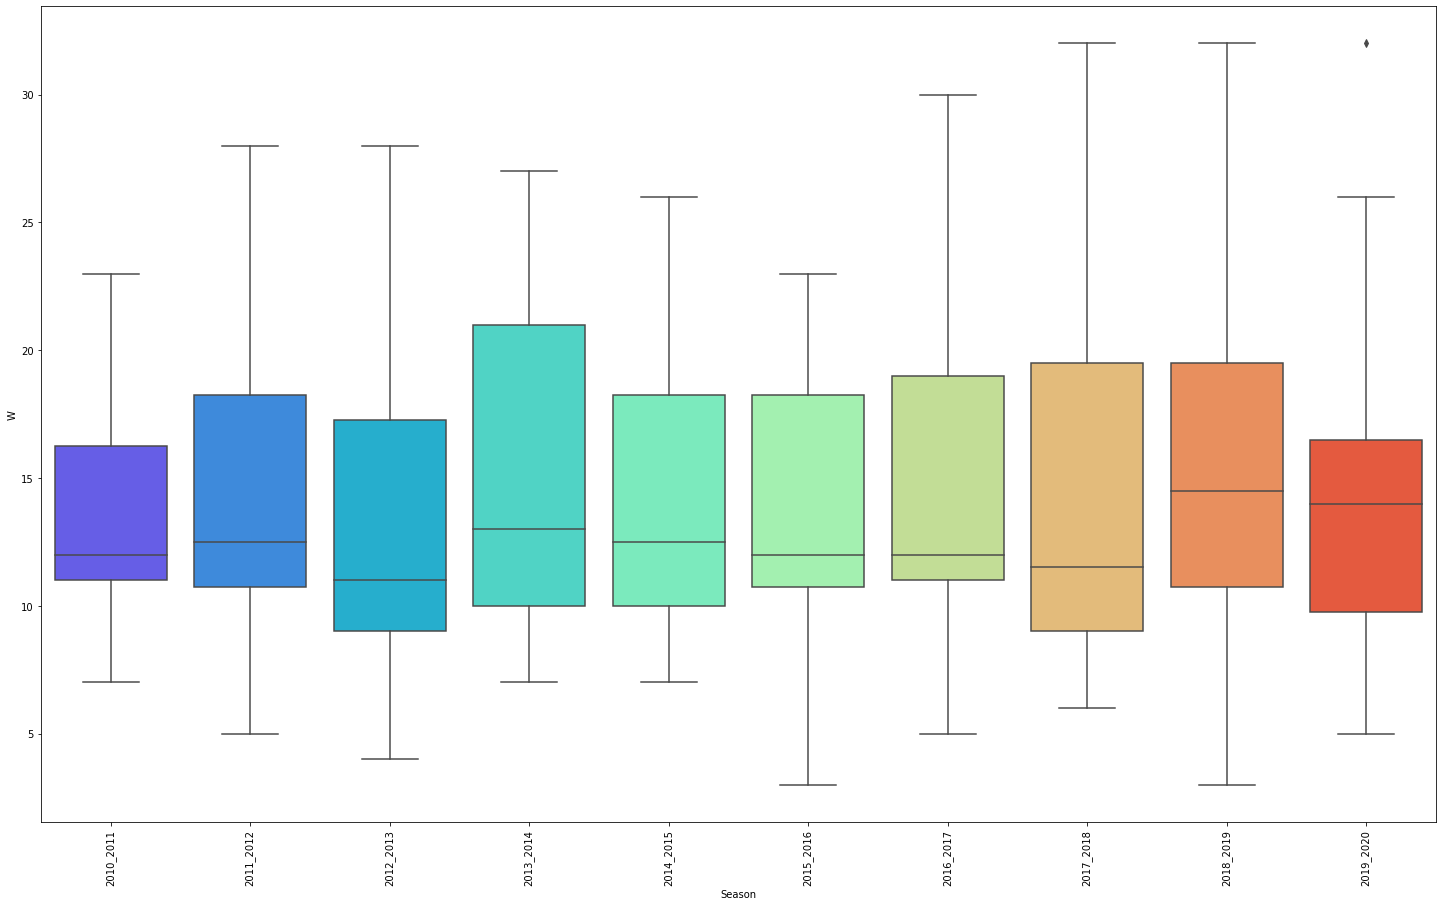

In [196]:
x = overall.groupby(["Squad","Season"]).agg({"W":"sum"}).reset_index()
plt.figure(figsize=(25,15))
sns.boxplot(x = x["Season"],y = x["W"],palette="rainbow")
plt.xticks(rotation='vertical')
plt.rc('font', size=20)

Average Wins per team look to be around 13 per season.

The outliers on the top seem to be the winners of the league that season.

## Club Wins

Text(0.5, 1.0, 'WINS BY TEAMS')

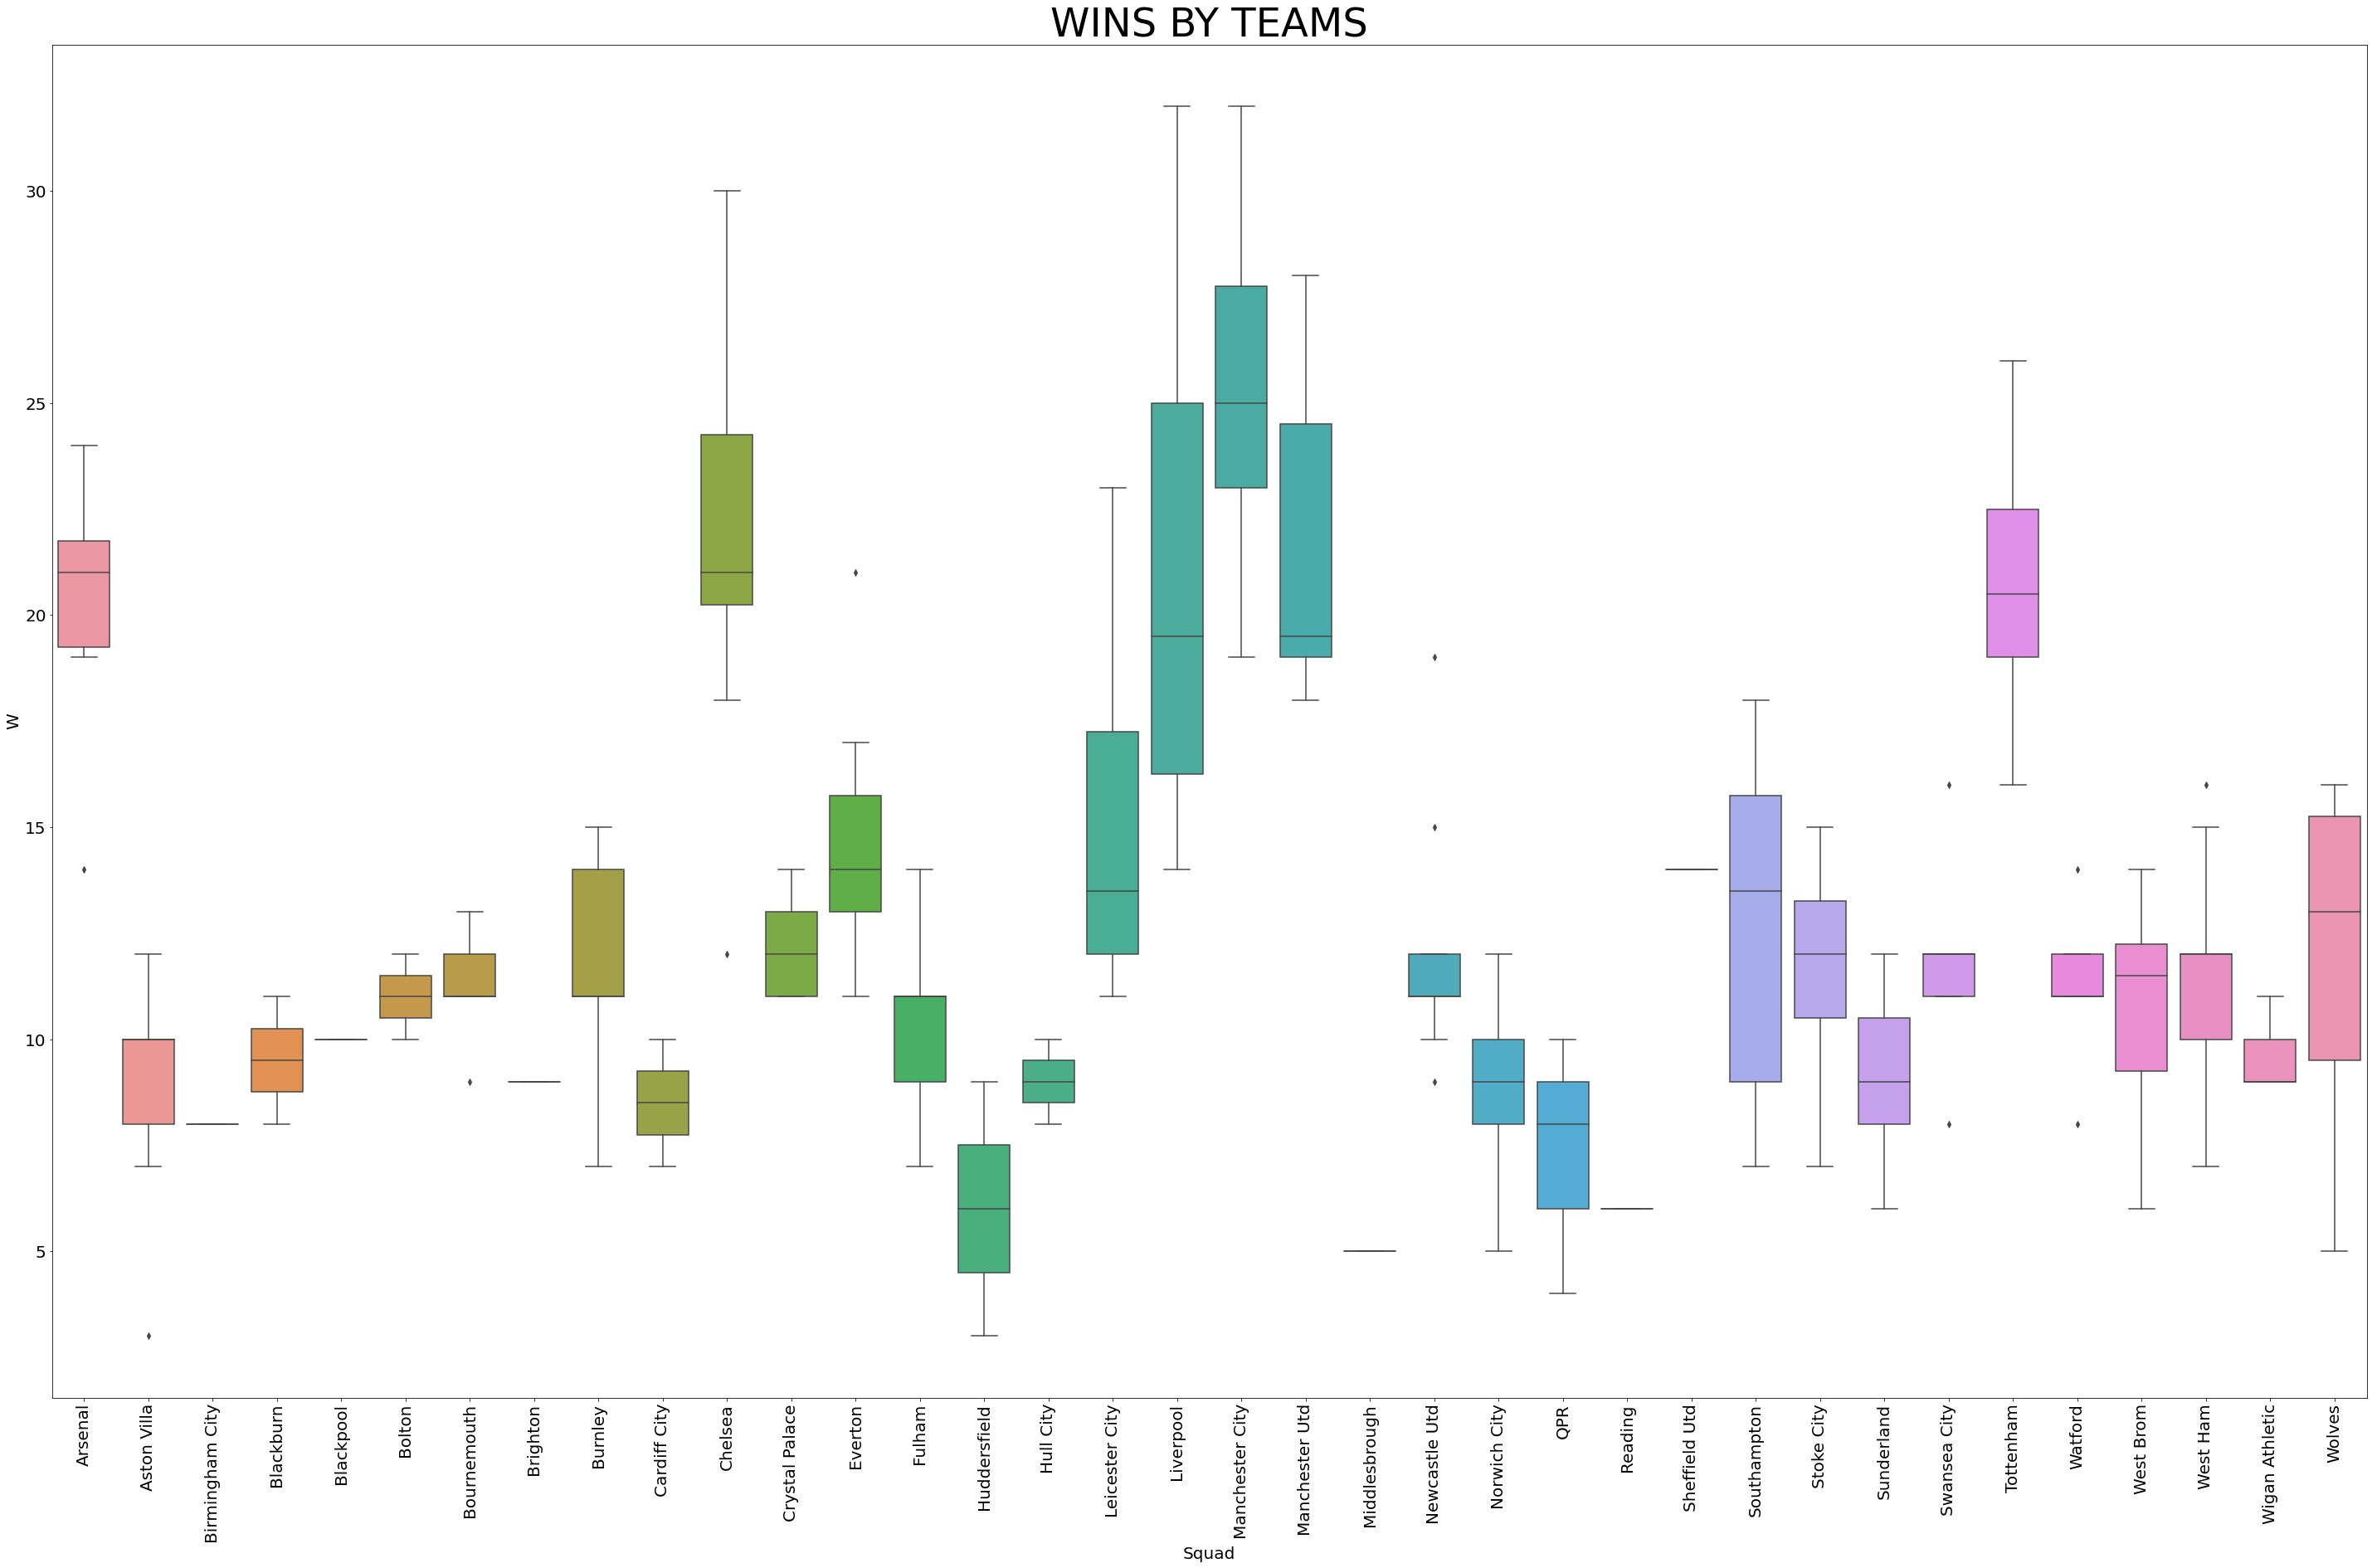

In [197]:
plt.figure(figsize=(50,30))
plt.xticks(rotation='vertical')
plt.rc('font', size=40)
sns.boxplot(x = x["Squad"],y = x["W"])
plt.title("WINS BY TEAMS")

We can See that Manchester city and Manchester united Stand out of the pack of teams while other teams such as Chelsea, Liverpool are slightly behind.

Liverpool's long tail suggests that they were so inconsistent in the last couple of decades

Single lines/Very small box plots suggest that those clubs have been in the EPL for a very few seasons. Birmingham city, Blackpool, Brighton,Middlesbrough,Reading,Sheffield utd are examples.

# Goals Scored - Season

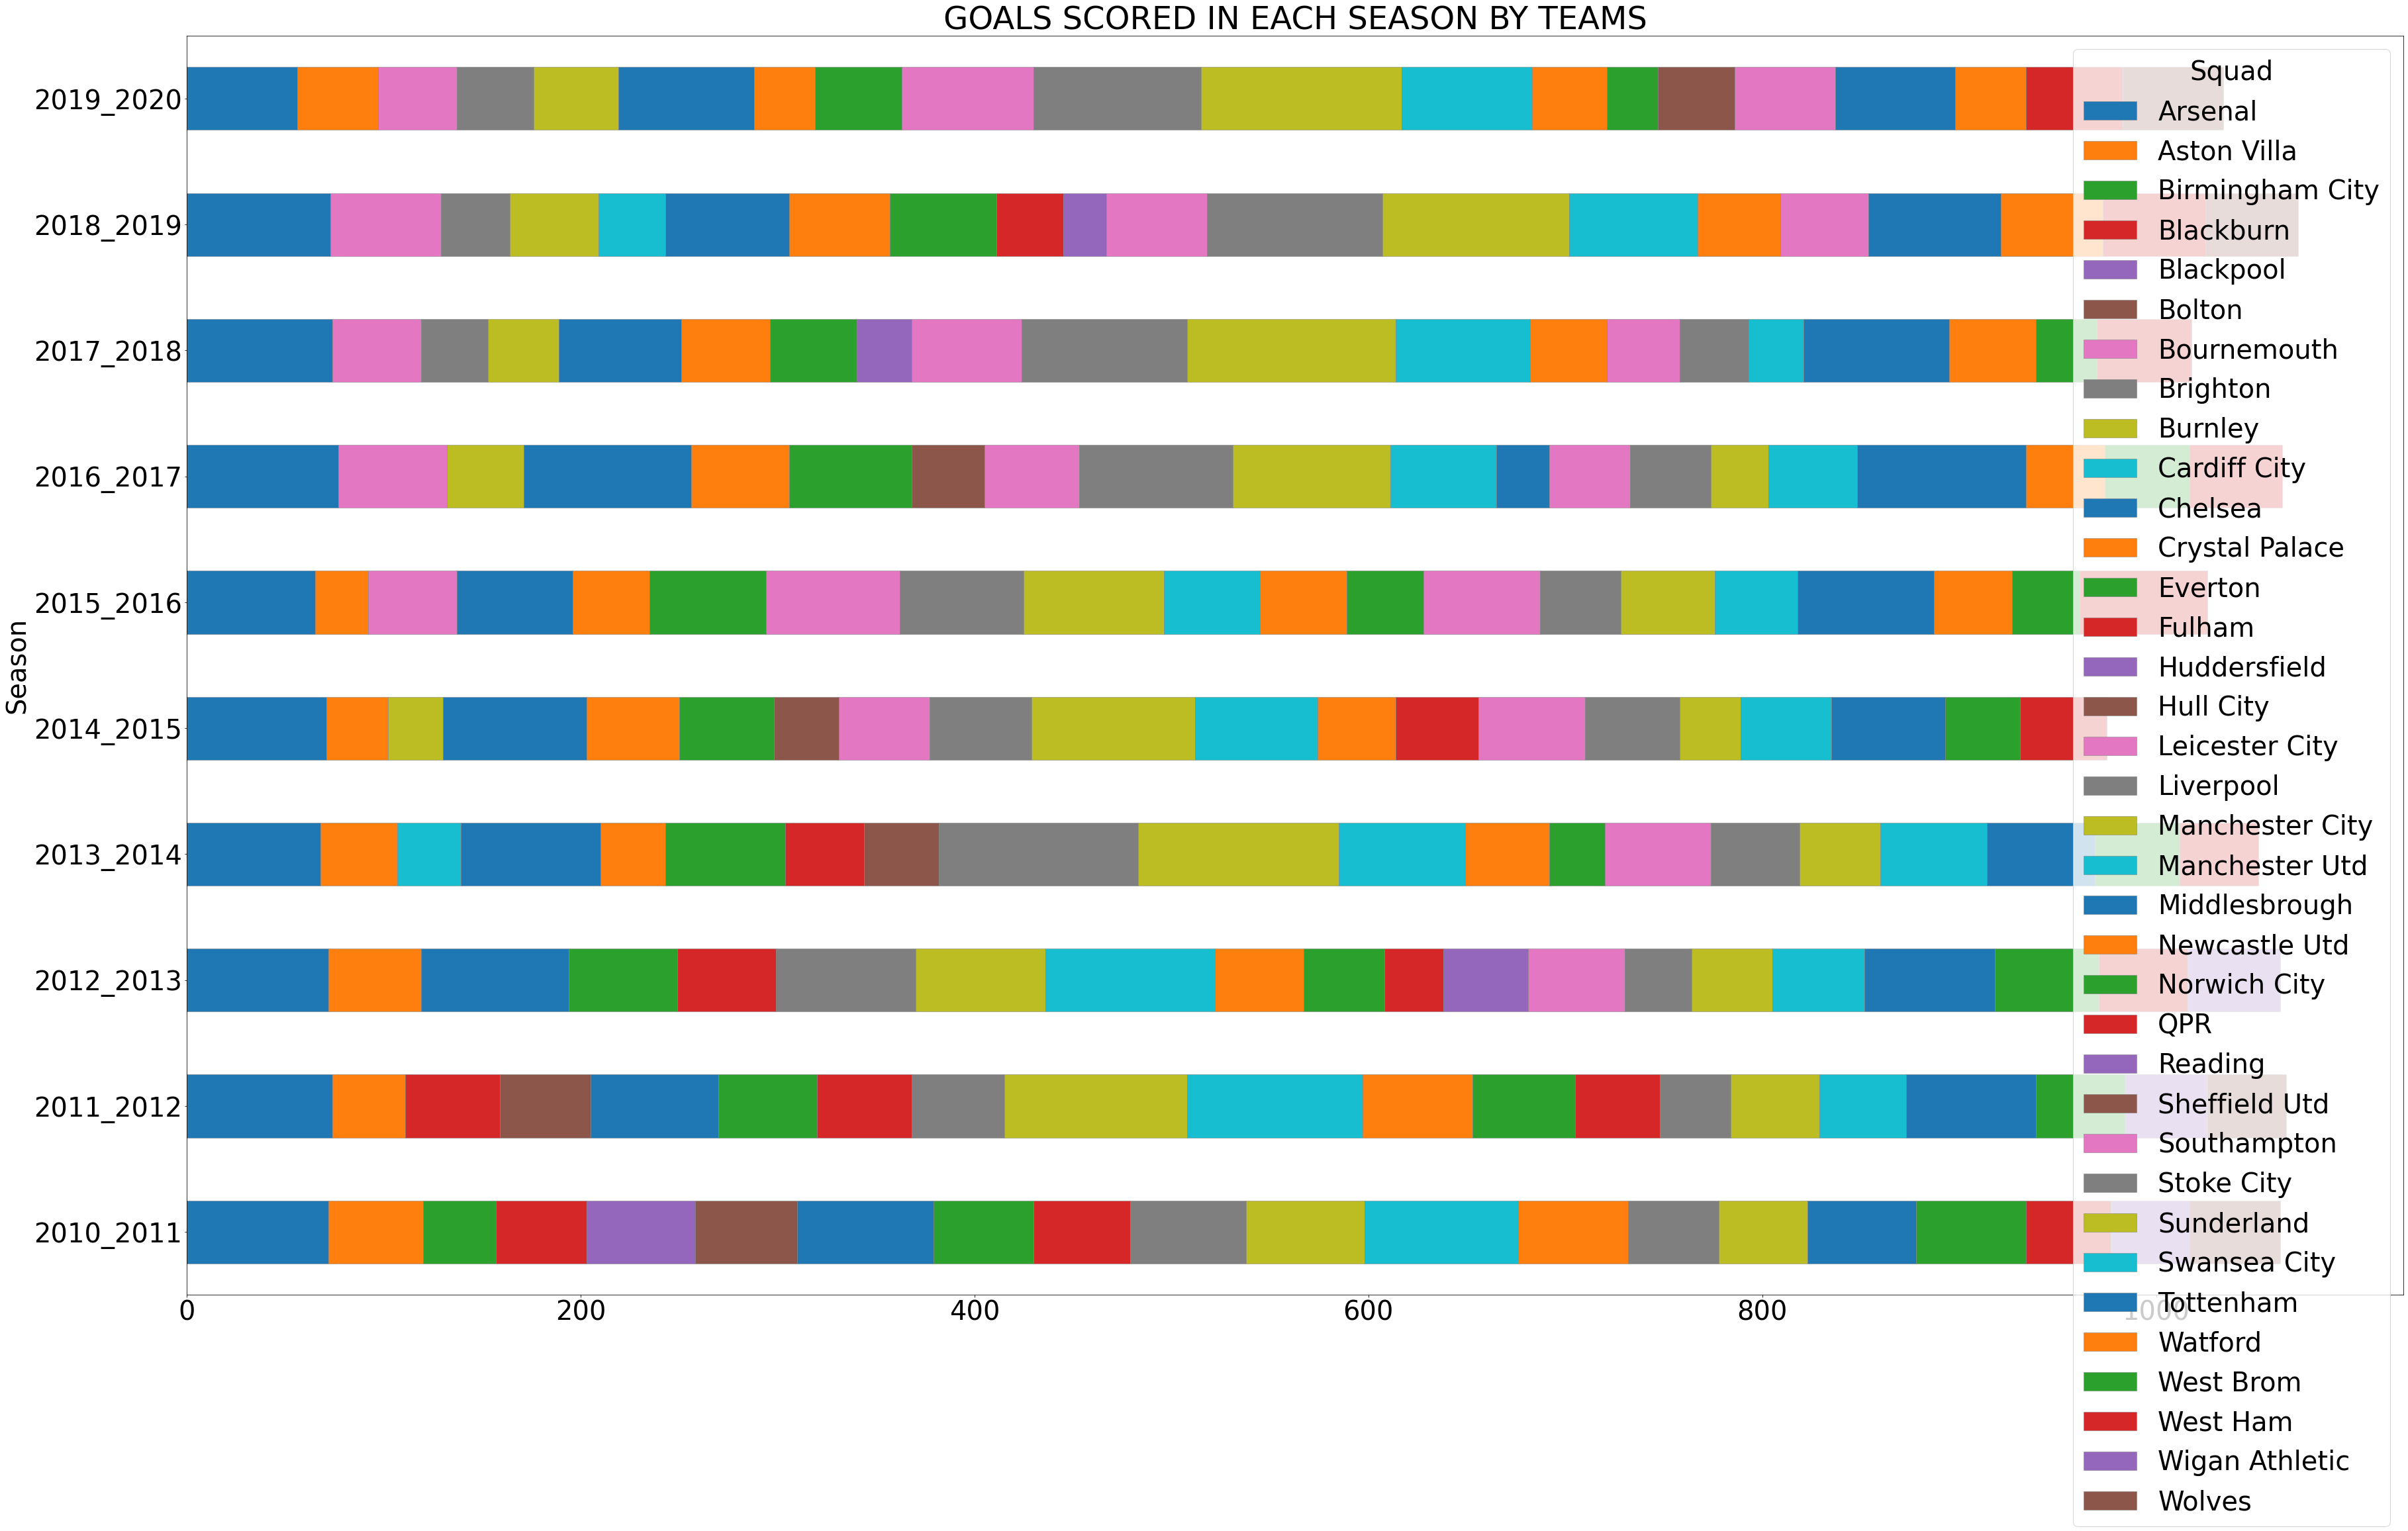

In [198]:
pvt = pd.pivot_table(index="Season",columns="Squad",values="GF",data=overall,aggfunc="sum")
pvt.plot(kind = "barh",stacked = True,figsize =(60,35),
         linewidth = .5,edgecolor = ["grey"]*5)
plt.title("GOALS SCORED IN EACH SEASON BY TEAMS")
plt.rc('font', size=25)
plt.show()

A lot of Army green, blue, deep blue, grey and Lite Blue suggesting the goals scored is dominated by Manchester city, Arsenal,chelsea, liverpool and Manchester united respectively

2010-2011 Season saw a lot of teams score similar number of goals as we can see the boxes are similar for most teams

# Top Scorers

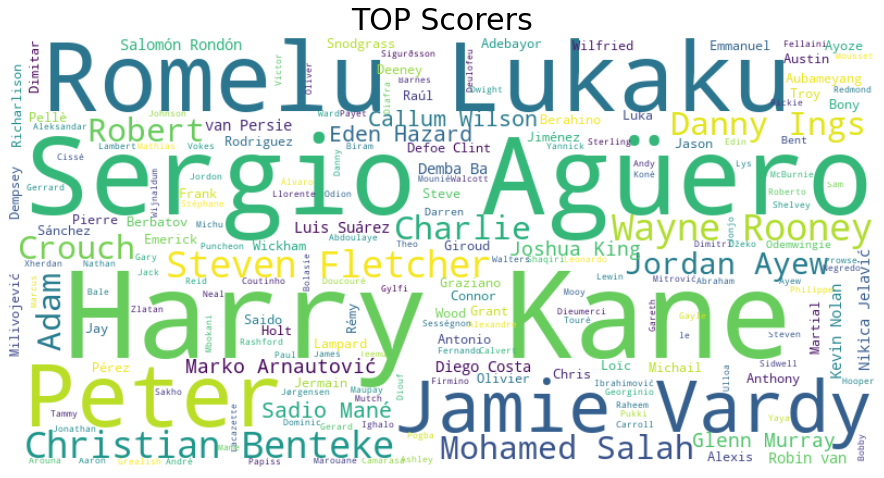

In [199]:
from wordcloud import WordCloud
import nltk
wc = WordCloud(background_color="white",scale=2).generate(" ".join(ovr['Top Team Scorer']))
fig = plt.figure(figsize=(20,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("TOP Scorers")
plt.show()

The Names of "Harry Kane", "Romelu Lukaku and "Sergio Aguero" standout as top scorers. 

"Jarmie Vardy" and "Peter" appears the next big player

"Rooney, Fletcher, Benteke and Salah appear slightly smaller as they did not play all the 10 seasons

# Density Plot between Free Kicks and Penalty Kicks

c:\users\enlongated\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2880x1440 with 0 Axes>

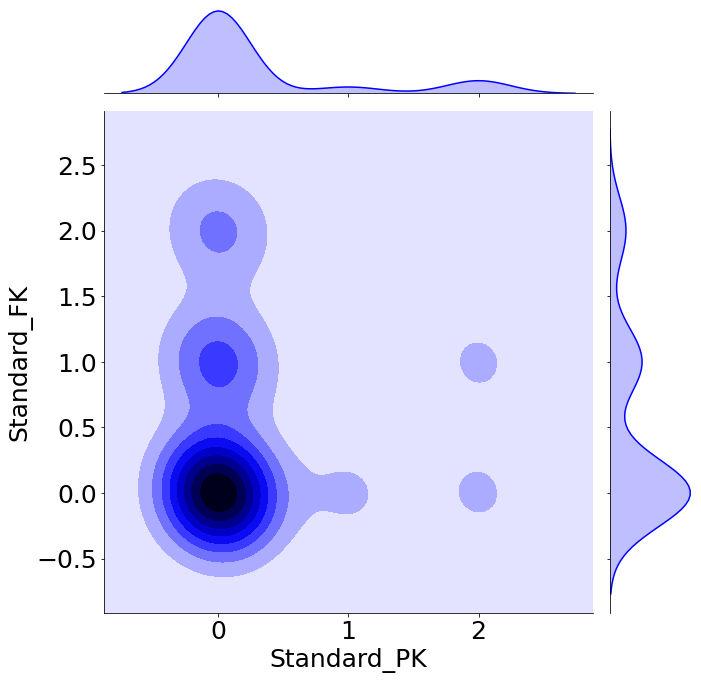

In [200]:
plt.figure(figsize=(40,20))
sns.jointplot(shoo["Standard_PK"],shoo["Standard_FK"],kind="kde",color="b",size = 10)

plt.show()

# Complete - Table

In [201]:
pvt1 = pd.pivot_table(index="Squad",values=["W","D","L","Pts","GDiff"],data=overall,aggfunc="sum")
pvt1= pvt1.sort_values('Pts',ascending=False)
pvt2= pd.pivot_table(index="Squad",values="Season",data=ovr,aggfunc="count")
pvt3= pd.pivot_table(index="Squad",values="Attendance",data=ovr,aggfunc="mean")
shoo.rename({'Unnamed: 0_level_0_Squad':'Squad'},axis=1, inplace=True)
pvt4= pd.pivot_table(index="Squad",values=["Standard_PK","Standard_FK","Standard_Sh","Standard_SoT","Standard_G/Sh"],data=shoo,aggfunc="mean")


pvt1 = pvt1.merge(pvt2, how='left',on='Squad')
pvt1 = pvt1.merge(pvt3, how='left',on='Squad')
pvt1 = pvt1.merge(pvt4, how='left',on='Squad')
pvt1.rename({'Season': 'Seasons in Laliga', 'Attendance': 'Avg.Attendance','Standard_PK':'Avg. Penalties Per Season','Standard_FK':'Avg. Freekicks Per Season','Standard_Sh':'Avg. Shots Per Season','Standard_SoT':'Avg. Shots on target Per Season'}, axis=1, inplace=True)
pvt1

,D,GDiff,L,Pts,W,Seasons in Laliga,Avg.Attendance,Avg. Freekicks Per Season,Standard_G/Sh,Avg. Penalties Per Season,Avg. Shots Per Season,Avg. Shots on target Per Season
Squad,,,,,,,,,,,,
Manchester City,61,522,64,826,255,10,48572.100000,NaN,NaN,NaN,NaN,NaN
Manchester Utd,89,306,74,740,217,10,73403.300000,NaN,NaN,NaN,NaN,NaN
Chelsea,82,297,82,730,216,10,40415.900000,0.0,0.22,1.0,9.0,4.0
Liverpool,88,319,80,724,212,10,46606.500000,0.0,0.10,2.0,20.0,4.0
Arsenal,88,266,88,700,204,10,58682.100000,2.0,0.23,0.0,13.0,5.0
Tottenham,87,237,89,699,204,10,41268.300000,0.0,0.00,0.0,10.0,5.0
Everton,114,55,120,552,146,10,36462.000000,0.0,0.07,0.0,15.0,5.0
Newcastle Utd,80,-113,152,410,110,9,48595.333333,1.0,0.13,0.0,16.0,3.0
West Ham,91,-88,146,406,105,9,43167.777778,0.0,0.00,0.0,15.0,3.0


Manchester city is the team with the highest points accumulated - 826 and the team with highest wins - 255

Aston Villa has the worst Goal Difference of all the teams with "-172"

Everton is the team with most draws - 114

Manchester united has the highest Avg. Attendance(Can be attributed to its capacity as well) - 73.4K

# Scatter Plot - Wins vs Season

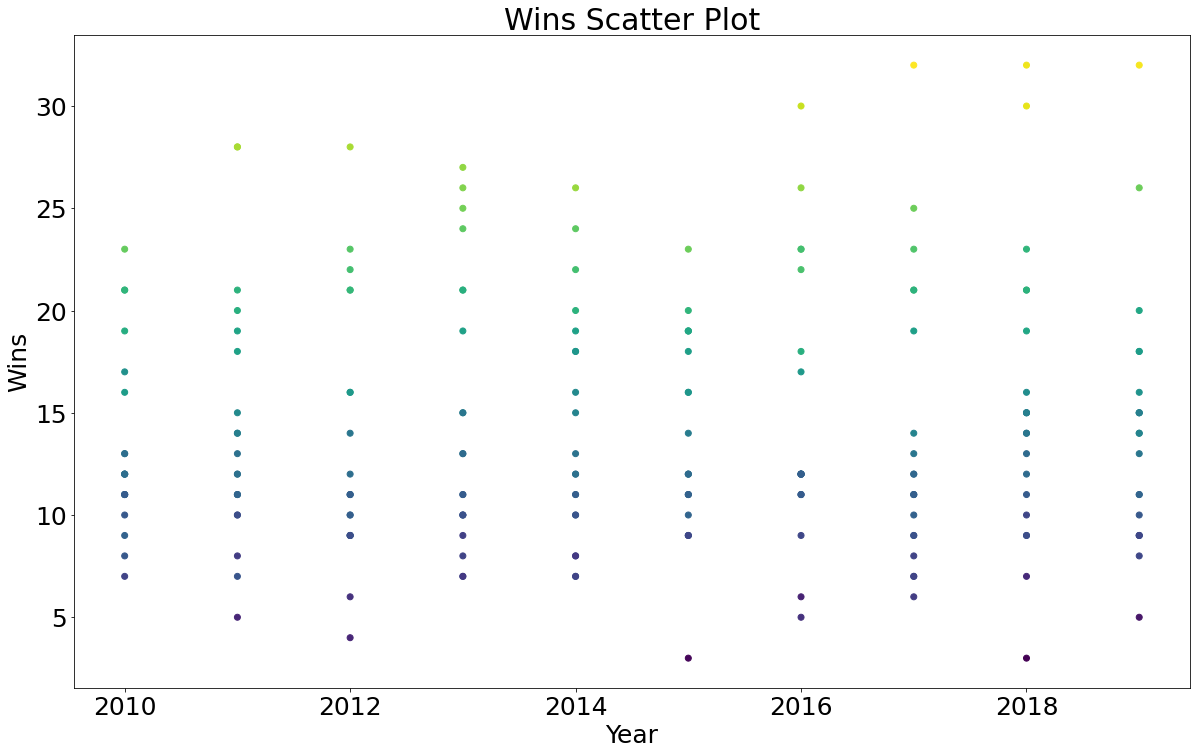

In [202]:
fig = plt.figure(figsize=(20,12))
plt.scatter(ovr['Start'], ovr['W'], c=ovr['Pts'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')
plt.show()

### Pass per Season

c:\users\enlongated\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


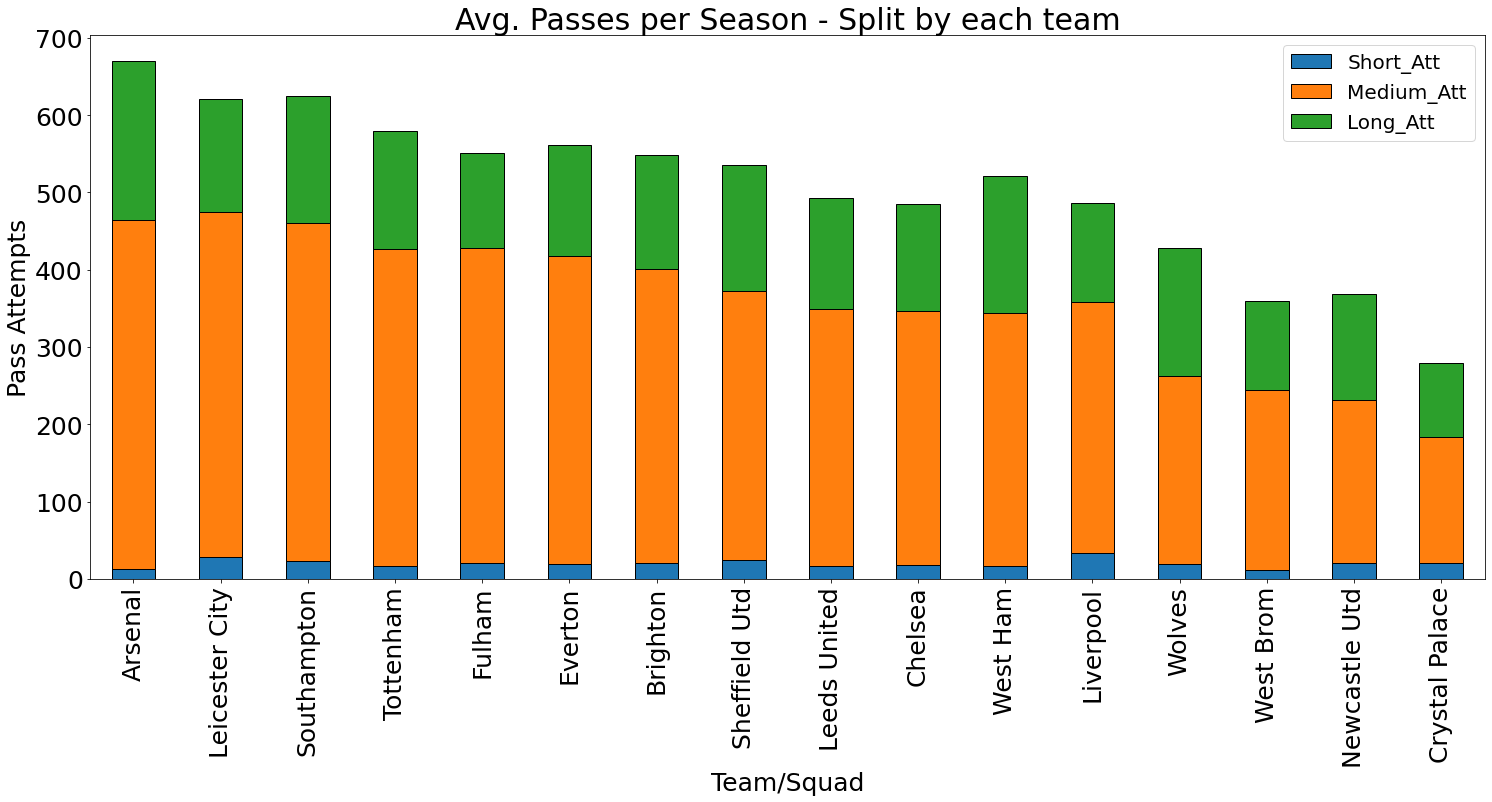

In [216]:
pvt5 = pd.pivot_table(index="Unnamed: 0_level_0_Squad",values=["Short_Att","Medium_Att","Long_Att"],data=passing,aggfunc="mean")
#pvt5.index = pvt5.`Unnamed: 0_level_0_Squad`
pvt5= pvt5.sort_values('Medium_Att',ascending=False)
pvt5[["Short_Att","Medium_Att","Long_Att"]].plot(kind = "bar",figsize=(25,10),
                                   stacked =True,linewidth = 1,
                                   edgecolor = "k"*30
                                  )
plt.legend(loc="best",prop = {"size" : 20})
plt.title("Avg. Passes per Season - Split by each team")
plt.xlabel("Team/Squad")
plt.ylabel("Pass Attempts")
plt.show()